<img src = "Diabetes.jpg" height = '10px' >

##### To Predict the diabetes:

In [286]:
# Importing necc libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [287]:
df = pd.read_csv("diabetes.csv")

In [288]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [289]:
df.size,df.shape

(6912, (768, 9))

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [291]:
df.columns 
# Our features that are used to check for diabites

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [292]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Most common  [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


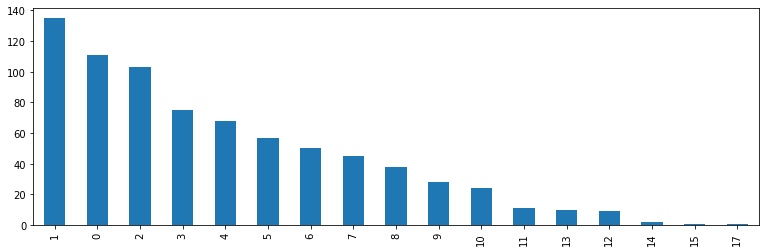

In [293]:
plt.figure(figsize=(13,4))
df['Pregnancies'].value_counts().plot.bar()

print("Most common ",df['Pregnancies'].unique())

Most common levels [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


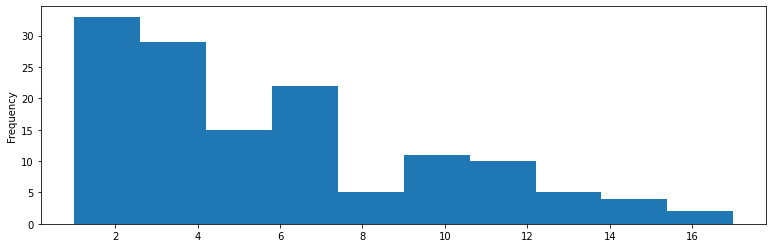

In [294]:
plt.figure(figsize=(13,4))
df['Glucose'].value_counts().plot.hist()

print("Most common levels",df['Glucose'].unique())

Most common  [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


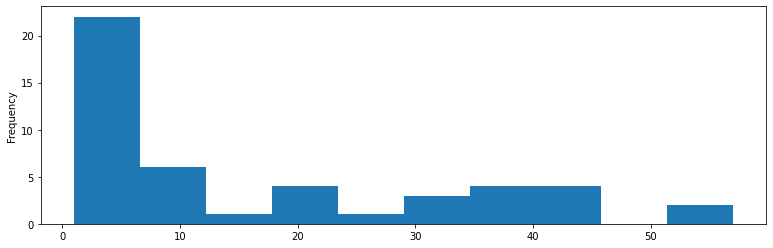

In [295]:
plt.figure(figsize=(13,4))
df['BloodPressure'].value_counts().plot.hist()

print("Most common ",df['BloodPressure'].unique())

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

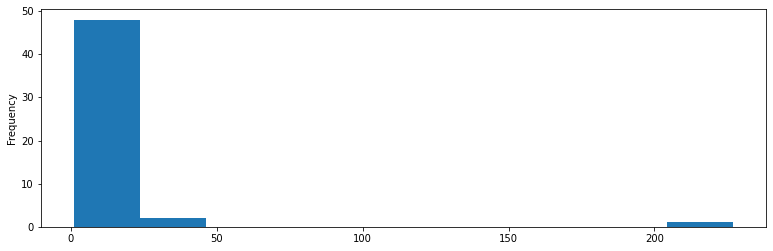

In [296]:
plt.figure(figsize=(13,4))
df['SkinThickness'].value_counts().plot.hist()

df['SkinThickness'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

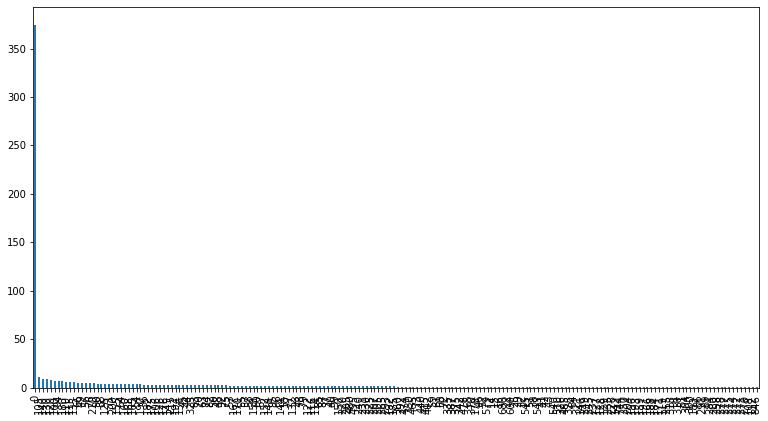

In [297]:
plt.figure(figsize=(13,7))
df['Insulin'].value_counts().plot.bar()

df['Insulin'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

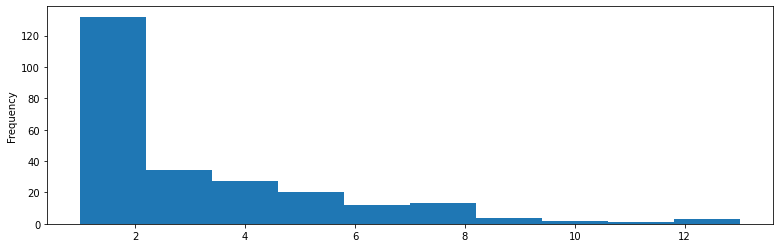

In [298]:
plt.figure(figsize=(13,4))
df['BMI'].value_counts().plot.hist()

df['BMI'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

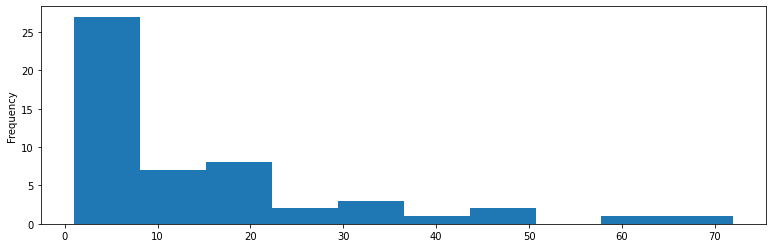

In [299]:
plt.figure(figsize=(13,4))
df['Age'].value_counts().plot.hist()

df['Age'].unique()

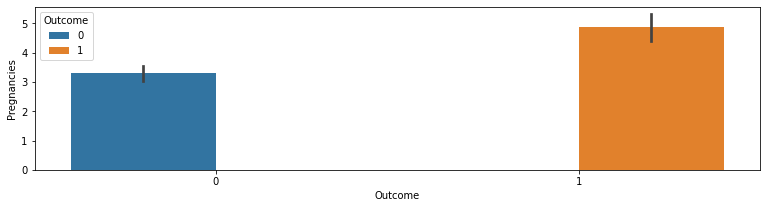

In [300]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="Pregnancies", hue="Outcome", data=df)

In [301]:
# one diabiatic
# 0 non diabiatic

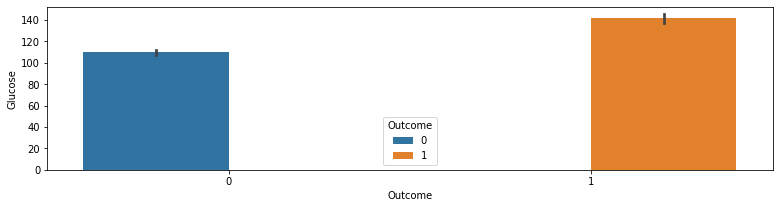

In [302]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="Glucose", hue="Outcome", data=df)

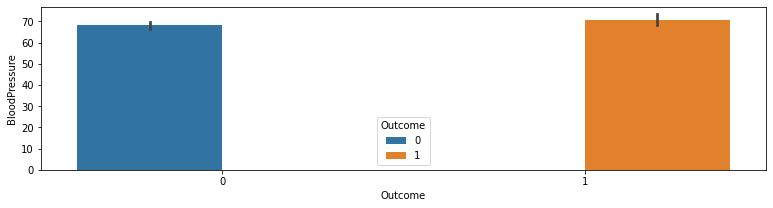

In [303]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="BloodPressure", hue="Outcome", data=df)

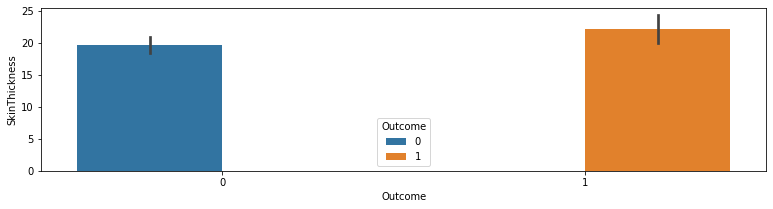

In [304]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="SkinThickness", hue="Outcome", data=df)

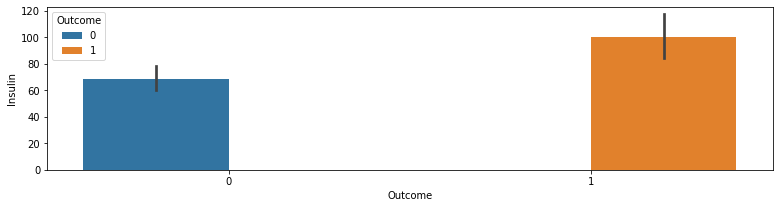

In [305]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="Insulin", hue="Outcome", data=df)

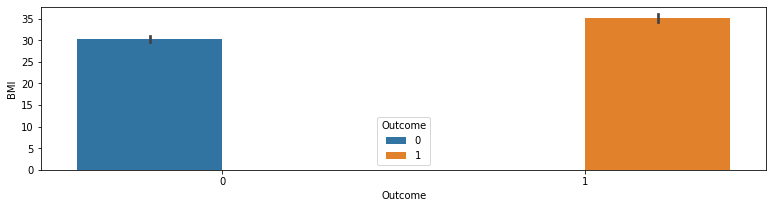

In [306]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="BMI", hue="Outcome", data=df)

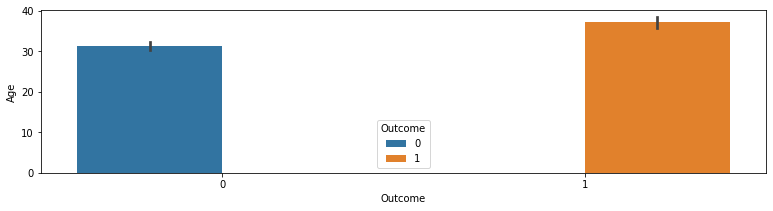

In [307]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="Age", hue="Outcome", data=df)

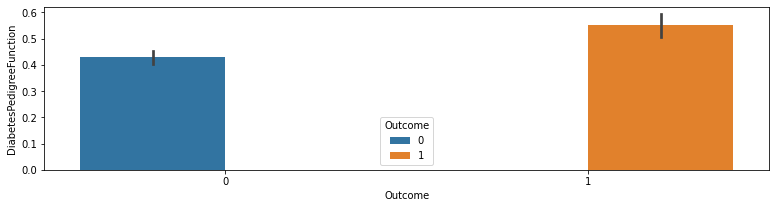

In [308]:
plt.figure(figsize=(13,3))
ax = sns.barplot(x="Outcome", y="DiabetesPedigreeFunction", hue="Outcome", data=df)

In [309]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [310]:
df.groupby(by="Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


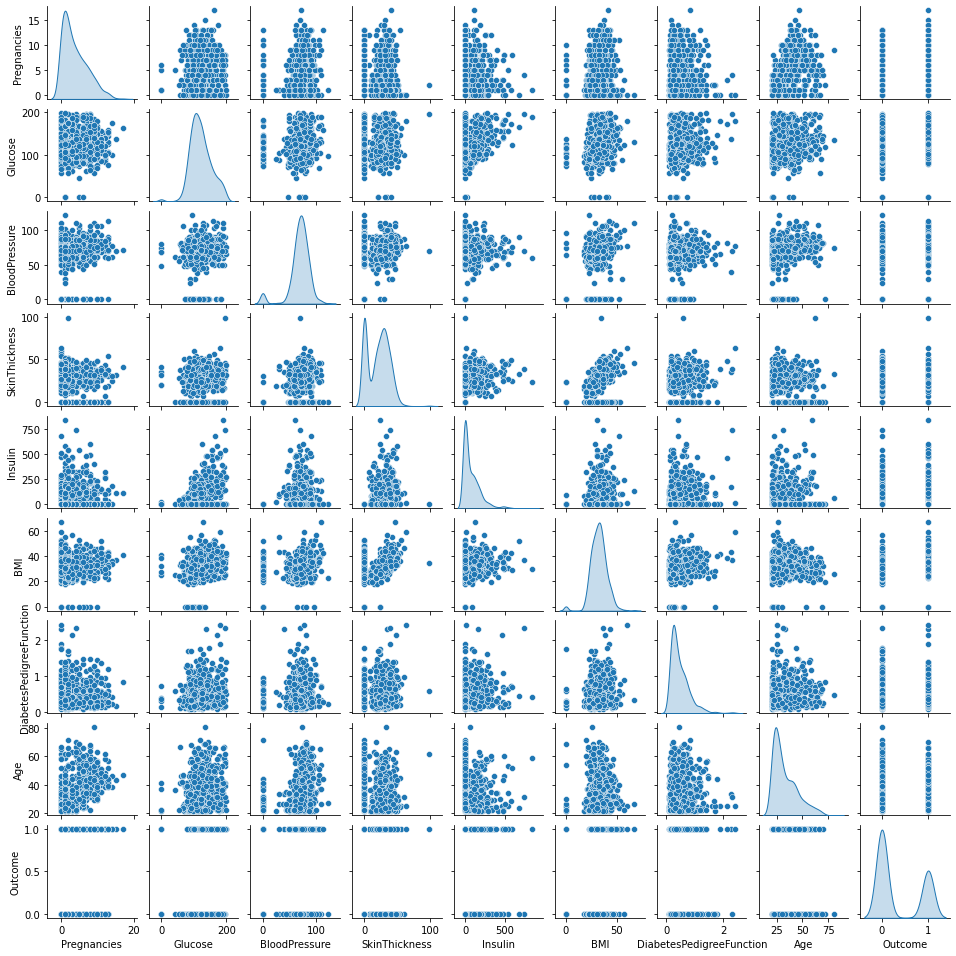

In [311]:
sns.pairplot(df, height=1.5,diag_kind="kde")

<AxesSubplot:>

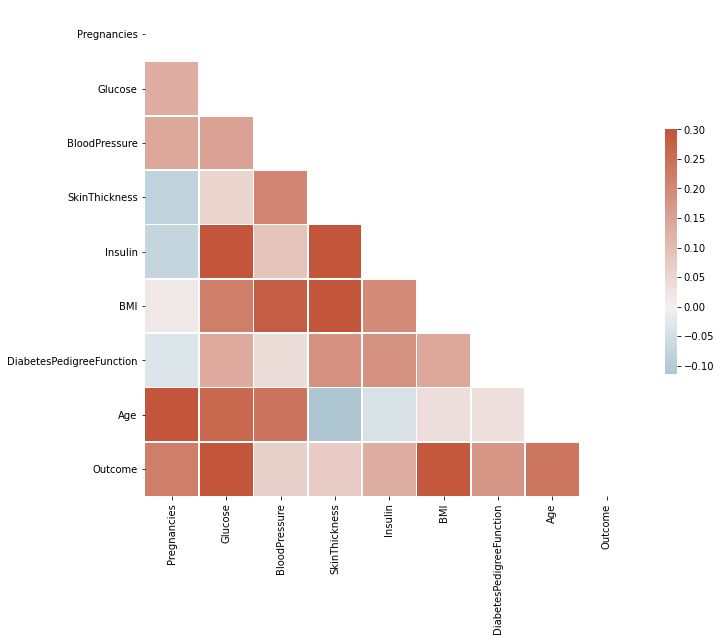

In [312]:
#Checking a corr matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [313]:
df.drop(columns=['DiabetesPedigreeFunction'],inplace=True)

In [314]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

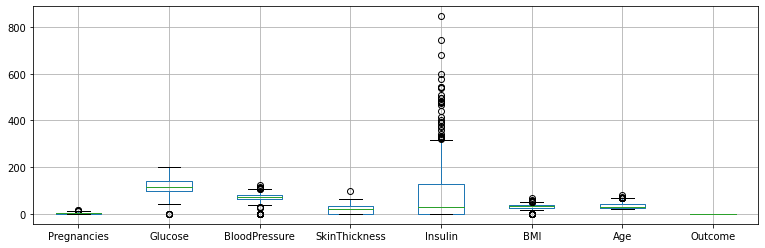

In [315]:
# Checking boxplot
plt.figure(figsize=(13,4))
df.boxplot()

# We see that insulin has some out of the values 

In [316]:
data=df.copy()

In [317]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [318]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

<AxesSubplot:>

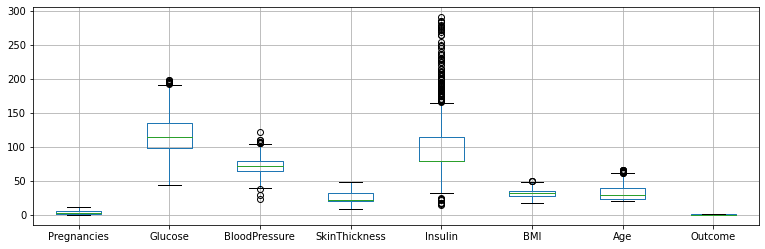

In [319]:
# Checking boxplot
plt.figure(figsize=(13,4))
data_cleaned.boxplot()

# We see that insulin has some out of the values 

In [320]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,33,1


In [321]:
# Checking is there na values :
data_cleaned.isna().sum()
# no na values

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [322]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    681 non-null    int64  
 1   Glucose        681 non-null    float64
 2   BloodPressure  681 non-null    float64
 3   SkinThickness  681 non-null    float64
 4   Insulin        681 non-null    float64
 5   BMI            681 non-null    float64
 6   Age            681 non-null    int64  
 7   Outcome        681 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 47.9 KB


In [323]:
data_cleaned.shape

(681, 8)

In [324]:
data_cleaned['Outcome'].value_counts()

0    458
1    223
Name: Outcome, dtype: int64

In [325]:
# Split the data into x and y 
X = data_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','Age']]
y = data_cleaned['Outcome']

In [326]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.80641359,  0.98082381,  0.00856655, ..., -0.43694456,
         0.26195073,  1.60876561],
       [-0.85571612, -1.17123209, -0.49416827, ..., -0.43694456,
        -0.83324955, -0.12950731],
       [ 1.47126548,  2.17641042, -0.66174655, ..., -0.43694456,
        -1.34955825, -0.03801926],
       ...,
       [ 0.47398765,  0.05851414,  0.00856655, ...,  0.21671346,
        -0.89583242, -0.22099536],
       [-0.85571612,  0.22931222, -0.9969031 , ..., -0.43694456,
        -0.28564941,  1.33430146],
       [-0.85571612, -0.89795515, -0.15901173, ..., -0.43694456,
        -0.23871225, -0.8614117 ]])

In [327]:
# calculating VIF for each feature
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.446063,Pregnancies
1,1.300392,Glucose
2,1.256307,BloodPressure
3,1.470103,SkinThickness
4,1.244168,Insulin
5,1.510723,BMI
6,1.651942,Age


In [338]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [336]:
from sklearn.ensemble import RandomForestClassifier


In [340]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [341]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(Y_validation, predictions))

0.656934306569343
[[73 20]
 [27 17]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        93
           1       0.46      0.39      0.42        44

    accuracy                           0.66       137
   macro avg       0.59      0.59      0.59       137
weighted avg       0.64      0.66      0.65       137



In [343]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.760784 (0.050221)
LDA: 0.752941 (0.052759)
KNN: 0.721569 (0.068375)
CART: 0.707843 (0.059117)
NB: 0.756863 (0.060879)
SVM: 0.758824 (0.049643)
RF: 0.772549 (0.050526)


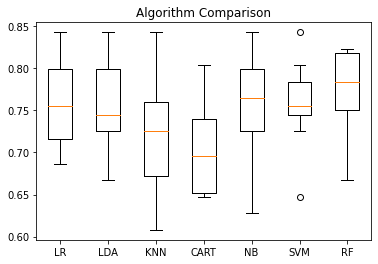

In [344]:
import matplotlib.pyplot as plt
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [352]:
# Make predictions on validation dataset
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
predictions=model_rf.predict(x_test)


In [357]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7660818713450293

In [358]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,predictions)
conf_mat

array([[100,  24],
       [ 16,  31]])

In [359]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [360]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7660818713450293

In [361]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8064516129032258

In [362]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8620689655172413

In [363]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8333333333333334

In [365]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [366]:
# Area Under Curve
auc = roc_auc_score(y_test,predictions)
auc

0.733013040494166

In [369]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

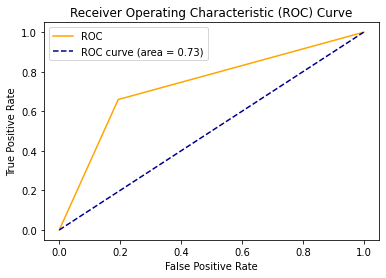

In [370]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [371]:
import pickle
# open a file, where you ant to store the data
file = open('Diabitiesclass.pkl', 'wb')

# dump information to that file
pickle.dump(model_rf, file)


In [372]:
model2 = open('Diabitiesclass.pkl','rb')
forest = pickle.load(model2)

In [373]:
forest.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [391]:
# or 
# x_test
one=x_test[6]
one=one.reshape(1,-1)
# then predict
forest.predict(one)

if forest.predict(one) == 0:
    print("You Dont have Diabities")
else:
    print("You have Diabities")

You have Diabities


In [ ]:
# We use various model to predict Diabities
# Also Use Multi collinearity using vif we dont any variable above 1 
# Random forest gives 77% accuracy so we choose to forward this model
# Now model Ready for prediction